In [175]:
# twitter
# 参考
# https://python-man.club/python_twitter_textmining/

In [176]:
import tweepy
import re
import zipfile
import urllib.request
import os.path
import glob
import MeCab
import itertools
from collections import Counter
import csv

In [186]:
consumer_key = 'Iebp6upiZxRCxSLRcQKIFWos6'
consumer_secret = 'ODjiu86H0TZUOMhVMgz9mg9sSBHcckMQngyRn1SuWjK0pjYhgl'
access_token = 'gXWIkQaklDqU6GqL8X9Iw3nYnCO1z8H6sFXQlU9iiI8sP'
access_token_secret = 'gXWIkQaklDqU6GqL8X9Iw3nYnCO1z8H6sFXQlU9iiI8sP'
bearer_token = "AAAAAAAAAAAAAAAAAAAAAAgWhAEAAAAAKsZhYvmcNSiZQQIRUNCJzfpdtAQ%3DrZWic2NLOYtYA7VFwXl7wvMgUdc5yDbSKqnU1fI09gCUWi69me"

client = tweepy.Client(bearer_token, consumer_key, consumer_secret, access_token, access_token_secret)
searchlist=[]
search = "国葬" 
tweet_max = 100
tweets = client.search_recent_tweets(query = search, max_results = tweet_max)


for tweet in tweets.data:
    text = re.sub(r'\n', '', tweet.text)
    searchlist.append(text)




BadRequest: 400 Bad Request
The `max_results` query parameter value [1000] is not between 10 and 100

In [178]:
# # ツイートID
# id
# # ツイート内容
# text
# # ツイート時刻
# created_at
# # ユーザーID
# user.id
# # アカウント名
# user.name
# # いいね数
# favorite_count
# # リツイート数
# retweet_count
# # そのユーザーのフォロワー数
# user.follwer_count
# # そのユーザーのフォロー数
# user.friends_count

In [183]:
mecab = MeCab.Tagger()
feature="名詞"
lis=[]
string=""
for cnt in range(len(searchlist)):
    node=mecab.parseToNode(searchlist[cnt])

    while node:
        if feature == node.feature.split(",")[0]: 
            if len(node.surface)>1:
                string+=node.surface
                lis.append(node.surface)
        node = node.next

words_count = Counter(lis)
result = words_count.most_common()
dic_result = dict(result)

In [184]:

np_dic = {}
fp = open("django/sys/pn.csv", "rt", encoding="utf-8")
reader = csv.reader(fp, delimiter='\t')


for row in reader:
  name = row[0]
  result = row[1]
  np_dic[name] = result

np_word_dic={}
# 数える
res = {"p":0, "n":0, "e":0}
for word in dic_result.keys():
  # 辞書にあるか確認
  if word in np_dic:
    r = np_dic[word]
    if word not in np_word_dic:
      np_word_dic[word]=r
    if r in res:
      res[r] += 1
  else:
    res['e']+=1
    np_word_dic[word]='e'


# 結果を表示
print(res)
cnt = res["p"] + res["n"] + res["e"]
print("ポジティブ度", res["p"] / cnt)
print("ネガティブ度", res["n"] / cnt)



{'p': 46, 'n': 58, 'e': 699}
ポジティブ度 0.057285180572851806
ネガティブ度 0.0722291407222914


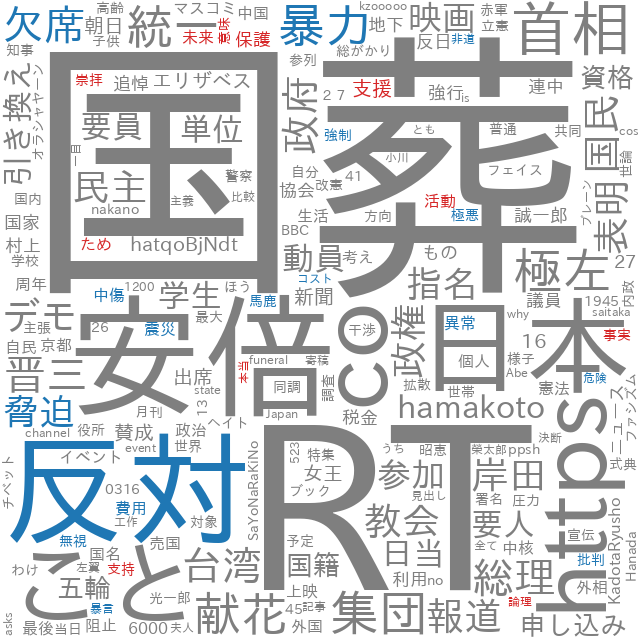

In [185]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm
import matplotlib.colors as mcolors

res=[]

def get(word):
    if word == "n":
        return 0
    elif word == "p":
        return 6
    elif word == "e":
        return 14



# 品詞ごとに整数値を返す辞書を作る
# カラーマップ指定

def result():
# 単語ごとに色を戻す関数
    def pos_color_func(word,**kwargs):
        cmap = cm.get_cmap("tab20")
        color_index=get(np_word_dic[word])
        rgb = cmap(color_index)

        return mcolors.rgb2hex(rgb)



    FONT_PATH = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
    wordcloud = WordCloud(font_path=FONT_PATH,width=640, height=640,background_color='white', color_func = pos_color_func).fit_words(dic_result)
    return wordcloud.to_image()


result()